### Create the data

In [ ]:
import random
import math
import numpy as np
from IPython.display import HTML, display

from matplotlib import pyplot as plt


def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)


def plot_data(X, y, d=0, auto=False, zoom=1):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis(np.array((-1.1, 1.1, -1.1, 1.1)) * zoom)
    if auto is True: plt.axis('equal')
    plt.axis('off')
    _m, _c = 0, '.15'
    plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
    plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)


def plot_sklearn_model(X, y, model):
    mesh = np.arange(-1.1, 1.1, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)
    data = np.vstack((xx.reshape(-1), yy.reshape(-1))).T
    Z = model.predict(data)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plot_data(X, y)


In [ ]:
set_default()

In [ ]:
seed = 12345
random.seed(seed)
np.random.seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes


In [ ]:
np.random.randn

<function RandomState.randn>

In [ ]:
X = np.zeros((N * C, D))
y = np.zeros((N * C))
for c in range(C):
    index = 0
    t = np.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = np.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + np.random.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * np.array((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", X.shape)
print("y:", y.shape)

Shapes:
X: (3000, 2)
y: (3000,)


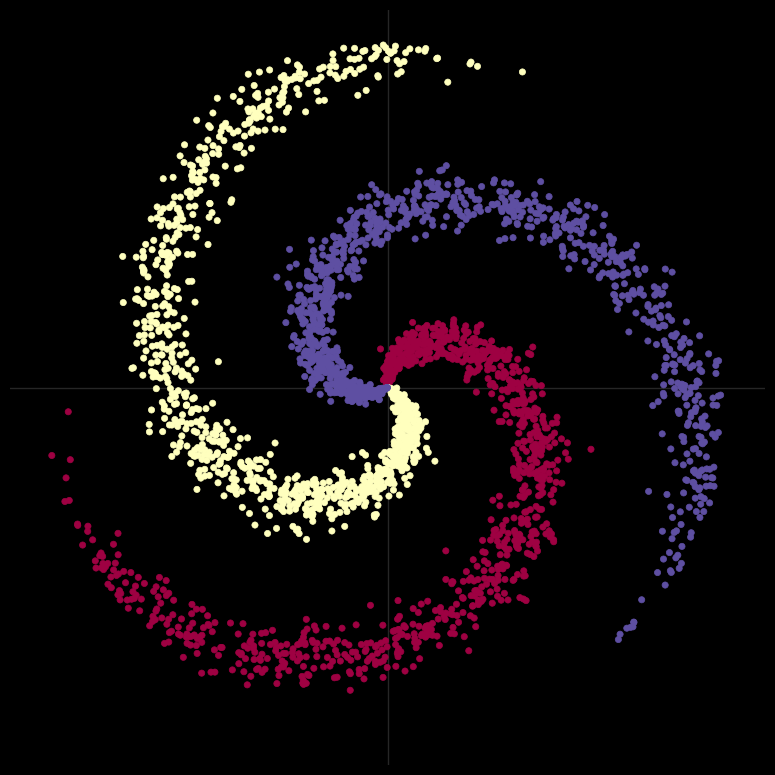

In [ ]:
# visualise the data
plot_data(X, y)

### Clasificator SVM Liniar



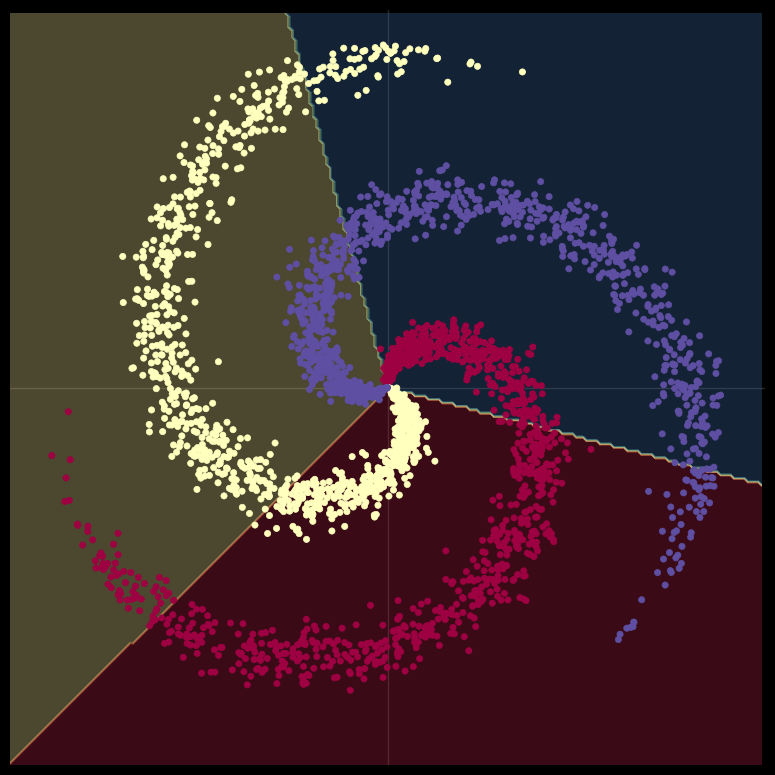

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X, y)
plot_sklearn_model(X, y, model)

### MLP Classifier

-  incercati diferite functii de activare: 'identity', 'logistic', 'tanh', 'relu'
- incercati numere diferite de neuroni / straturi



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


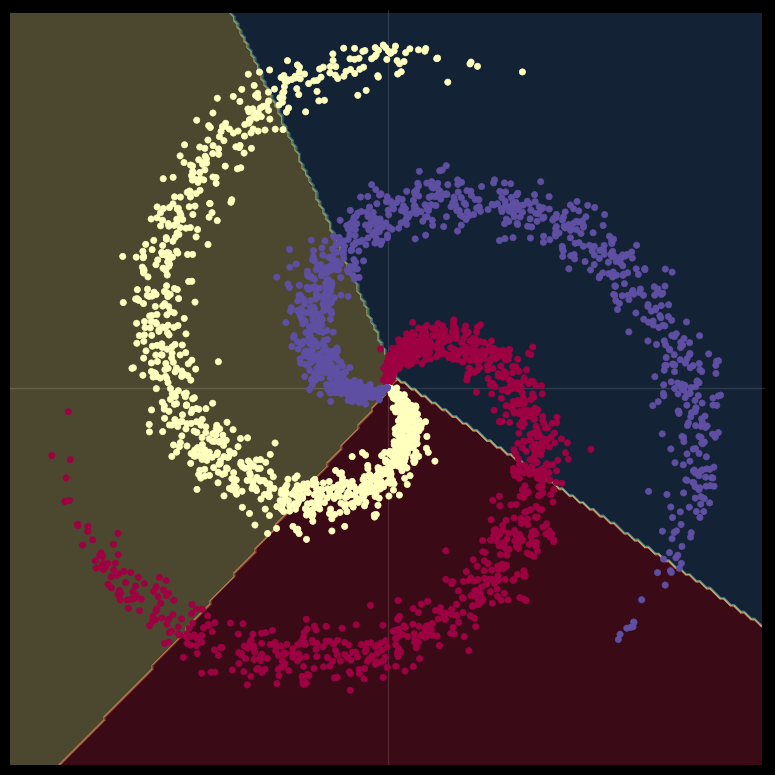

In [ ]:
from sklearn.neural_network import MLPClassifier
# un strat
# incercati diferite functii de activare
# 'identity', 'logistic', 'tanh', 'relu'
model = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(10, ), activation='relu', solver='sgd')
model.fit(X, y)
plot_sklearn_model(X, y, model)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


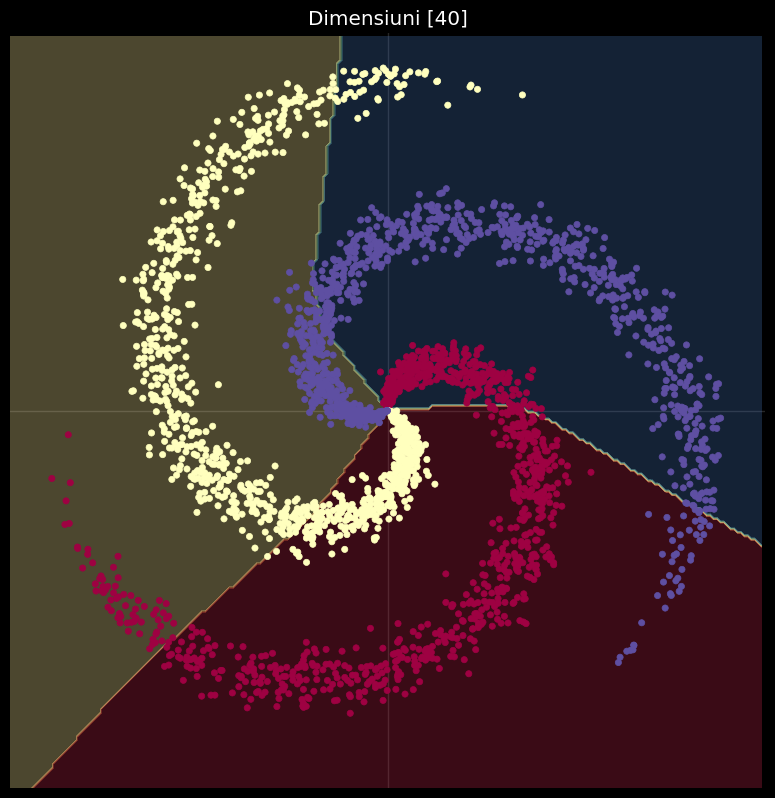

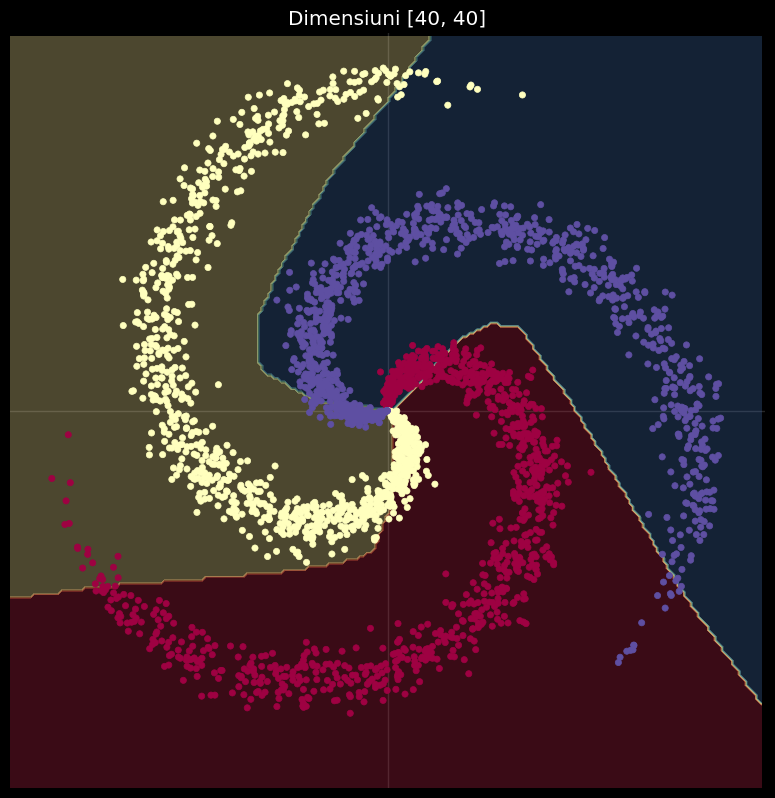

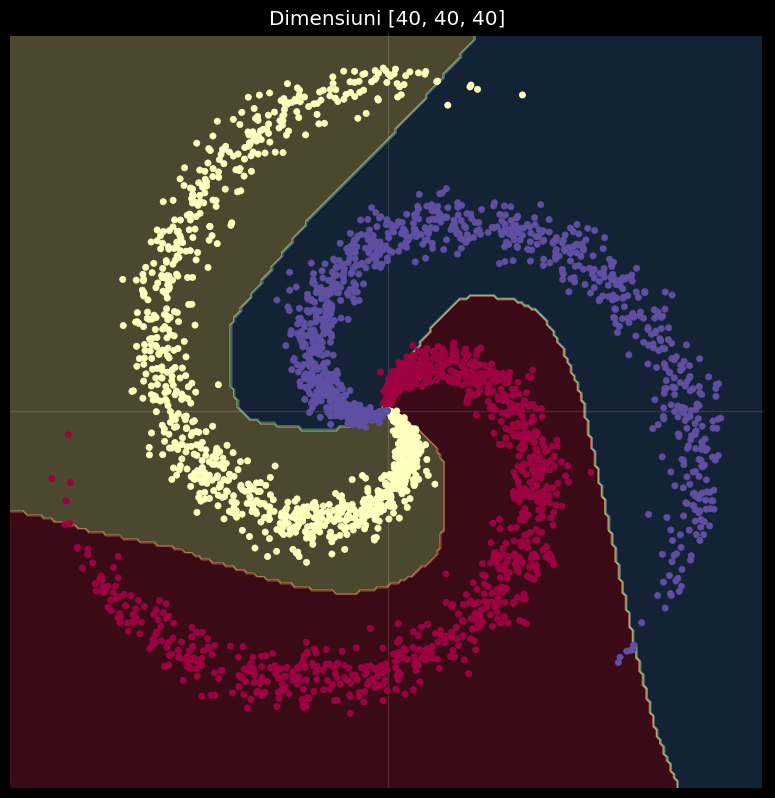

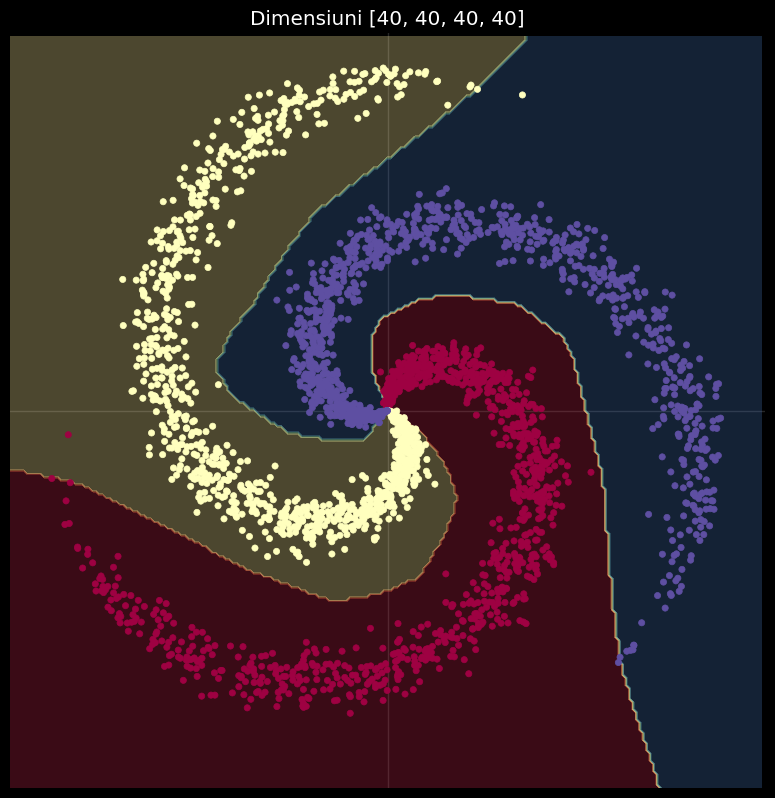

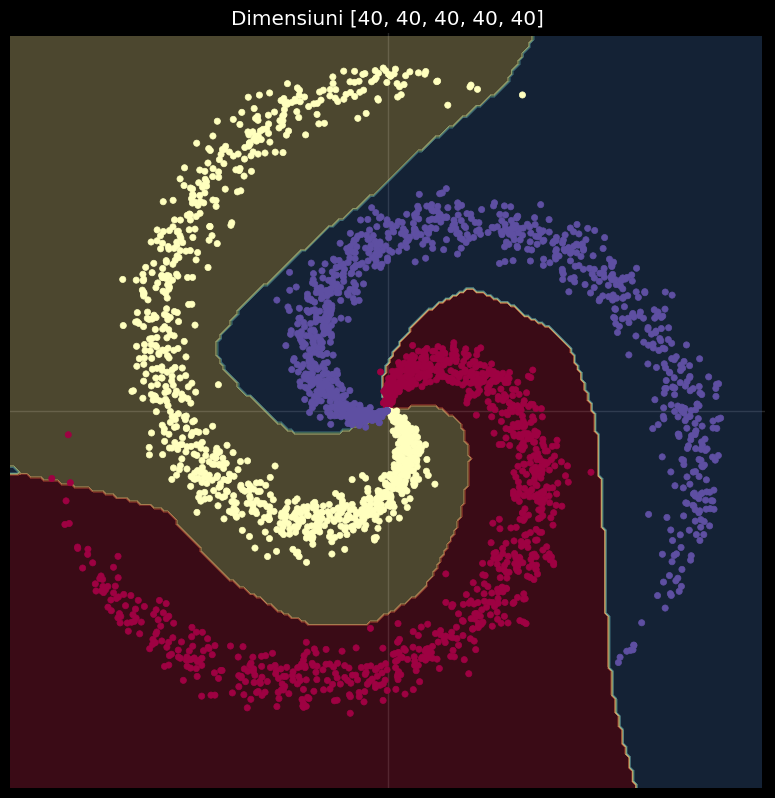

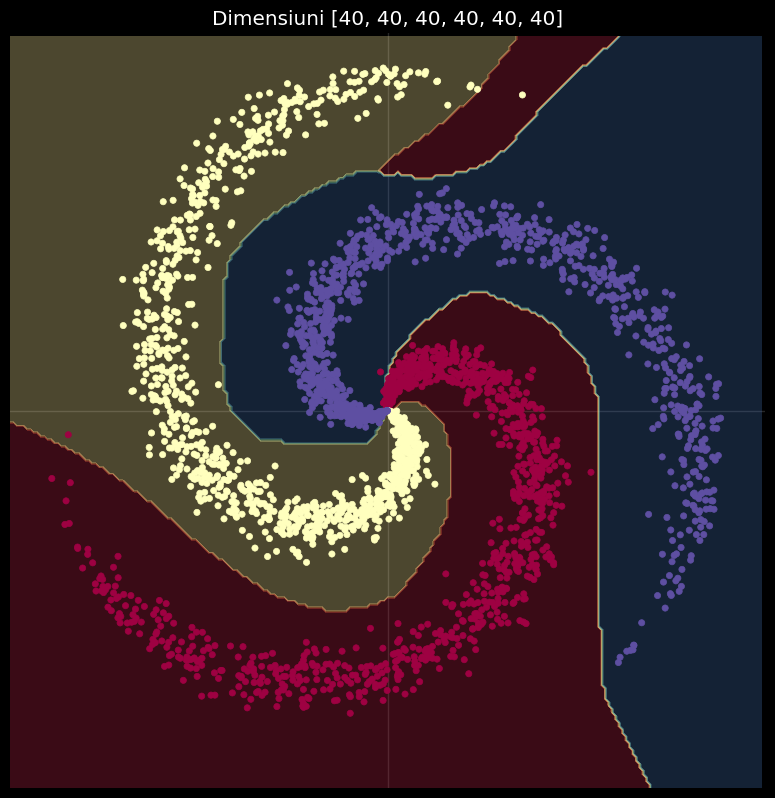

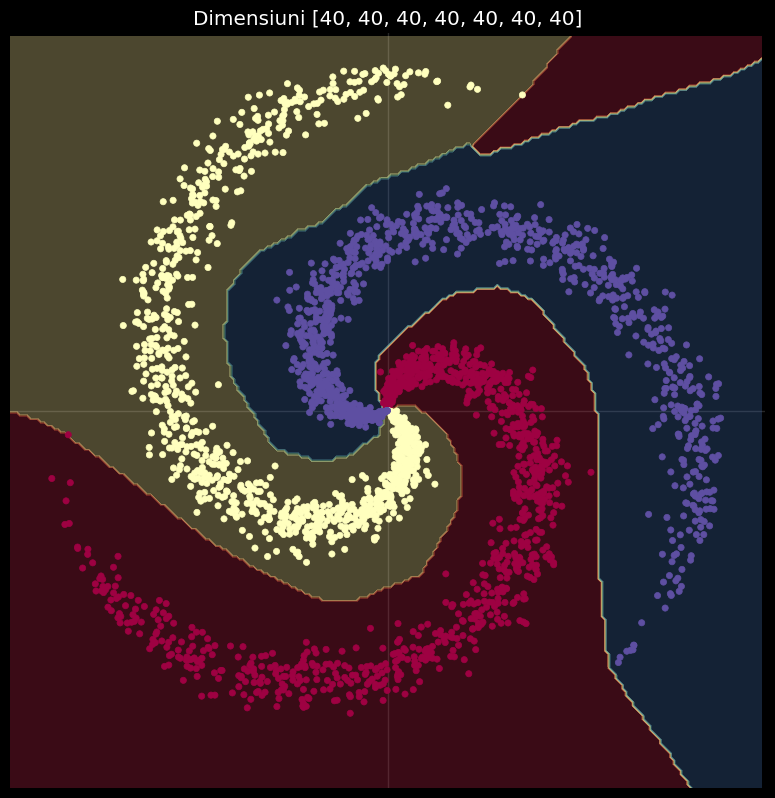

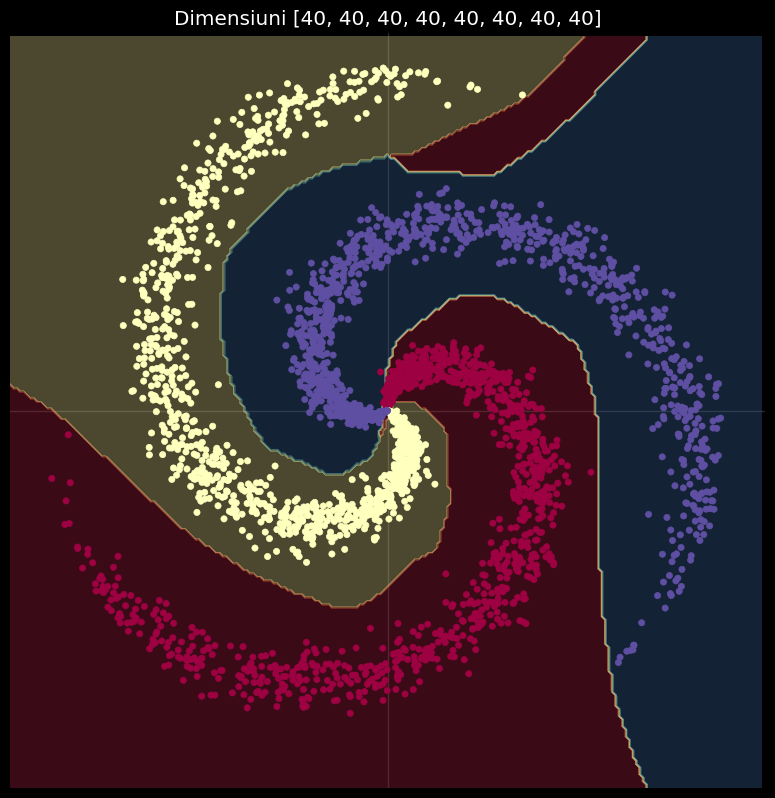

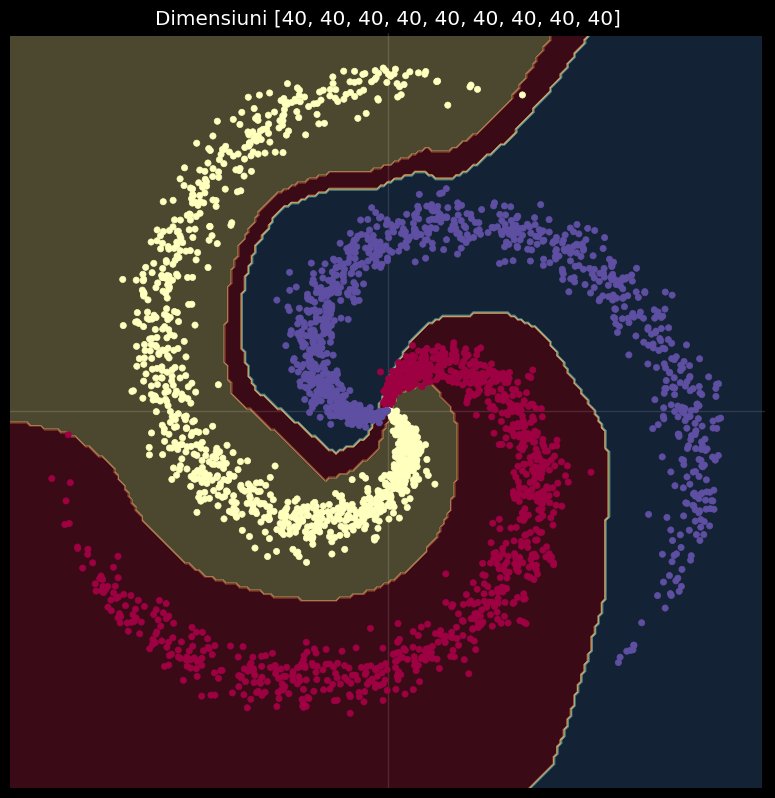

In [ ]:
from sklearn.neural_network import MLPClassifier
nr_de_neuroni_pe_strat = 40 # hidden units
for nr_de_straturi in range(1, 10):
    dimensiuni = nr_de_straturi * [nr_de_neuroni_pe_strat]
    model = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=dimensiuni, activation='relu', solver='sgd')
    model.fit(X, y)
    plt.figure()
    plt.title(f'Dimensiuni {str(dimensiuni)}')
    plot_sklearn_model(X, y, model)
    